# REDES NEURONALES CONVOLUCIONALES

## Tensores
- Dato multidimensional (escalar, vector, matriz, tensor)

<img src="img/tensors.jpeg" width="600">

<img src="./img/3d_tensor.PNG" width="700">

- Deep learning consiste en una serie de transformaciones (operaciones matemáticas con tensores) del input para dar output. 

<img src="./img/sheet_transformacion.PNG" width="400">

 - Operacion mas importante: tensor dot (matmul)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(256,)), # input 2D tensor con dimensiones 256,ANY. La sintaxis (256,) indica tuple con solo un numero
    tf.keras.layers.Dense(64, ),  # output 1D tensor con dimensiones (64)
    tf.keras.layers.Dense(32, )   # (input asumido de la capa anterior) output 1D tensor con dimension (32)
])

In [5]:
# mostrar estructura del modelo
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,528 (72.38 KB)

 Trainable params: 18,528 (72.38 KB)

 Non-trainable params: 0 (0.00 B)

# CONSTRUCCIÓN DE REDES

Para la construcción de nuestras arquitecturas tenemos que tener en cuenta que exista compatibilidad entre las dimensiones de output e input entre las capas !!!

## Tipos de capas
- Cada tipo de capa suele tener un uso (dependiente de la red a diseñar según el tipo de entrada y la aplicación):
 - **Dense** para tratar input vector o **datos estructurados** (2D tensor de samples,features)
 - **LSTM** (Recurrent Neural Networks) para tratar **secuencias lógicas** (3D tensores de samples,timestep,features)
 - **Convolucionales** (Convolutional Neural Network) para tratar **imagenes** (4D tensores de samples,height,weight,channels)


## Estructura de la red neuronal
- La mas habitual es secuencial (feedforward), pero hay más
    - Two-branch, 
    - Multihead, 
    - Inception
- La arquitectura ideal es un arte: Documentación tipo de problema, experiencia, experimentación.

## Convolución

- Las capas densas (*Dense layers*) son las que aprenden patrones globales (en toda la imagen) 
- Las capas con *Convoluciones* (*Conv2D*) detectan patrones locales y, además, son resistentes a transformaciones geométricas.

La diferencia fundamental entre una capa densamente conectada y una convolucional es que **la capa densa aprende patrones globales en su espacio global de entrada, mientras que la capa convolucional aprende patrones locales dentro de la imagen en pequeñas ventanas de dos dimensiones**.      

Cada etapa es un tipo de transformación de característica entrenable. Por ejemplo, una primera capa convolucional aprende elementos básicos como aristas, y una segunda capa convolucional aprende patrones compuestos de elementos básicos aprendidos en la capa anterior. Y así sucesivamente en cada cada hasta ir aprendiendo patrones muy complejos.   

<img src="./img/cnn_hz.png" width="900">


Las convoluciones, por tanto, permiten aprender jerarquías de patrones (patrones locales como lineas, curvas, etc. a circulos, rectangulos, a constelaciones)

<img src="img/cnn_representations.jpg" width="700">


## ¿Cómo funcionan?   

En la capa convolucional utilizamos pequeñas cuadrículas (llamadas kernels, filtros o núcleos) que se mueven sobre la imagen. Cada pequeña cuadrícula es como una minilupa que busca patrones específicos en la foto, como líneas, curvas o formas. A medida que se desplaza por la foto, crea una nueva cuadrícula que resalta dónde encontró estos patrones.    

Por ejemplo: Consideremos esta imagen en escala de grises de 32 x 32 de un dígito manuscrito. Los valores de la matriz se dan a título ilustrativo.   

<img src="./img/conv_letraa.avif">

Consideremos también el núcleo utilizado para la convolución: es una matriz con una dimensión de 3 x 3. Los pesos de cada elemento del núcleo se representan en la cuadrícula. Los **pesos cero** se representan en las cuadrículas negras y los **pesos uno**, en la cuadrícula blanca.   

¿Se debe calcular manualmente estos pesos?

En la realidad, los pesos de los núcleos ***se determinan durante el proceso de entrenamiento de la red neurona***l.

Utilizando estas dos matrices, podemos realizar la operación de convolución aplicando el producto escalar, y trabajar como sigue:

1. Aplicar la matriz del núcleo desde la esquina superior izquierda hacia la derecha.
2. Realizar el producto de Hadamard.
3. Sumar los valores de los productos.
4. El valor resultante corresponde al primer valor (esquina superior izquierda) de la matriz convolucionada.
5. Desplazar el núcleo hacia abajo con respecto al tamaño de la ventana deslizante.
6. Repetir los pasos del 1 al 5 hasta que la matriz de imagen esté totalmente cubierta.   

La dimensión de la matriz convolucionada depende del tamaño de la ventana deslizante. Cuanto mayor sea la ventana deslizante, menor será la dimensión.

<img src="./img/kernel_letraa.avif">

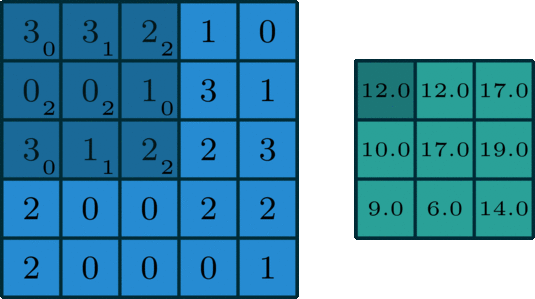

In [6]:
from IPython.display import Image
Image(filename="img/conv_normal.gif")

En resumen:   

- Divide el input (3D tensor) en parches y aplica la operación convolución (la misma en cada capa) a cada parche
- Output (3D tensor) es un mapa de features o **mapa de activaciones** (cada una el resultado de aplicar la transformacion). Dicho mapa tendra dimensiones **Height x Width x Nº filtros**. Cada capa del volumen (eje z) es el resultado de aplicar un filtro a cada parche del input.
- La convolución desliza cada parche sobre el input, parando en cada posible posicion y aplicando la transformacion (función kernel)

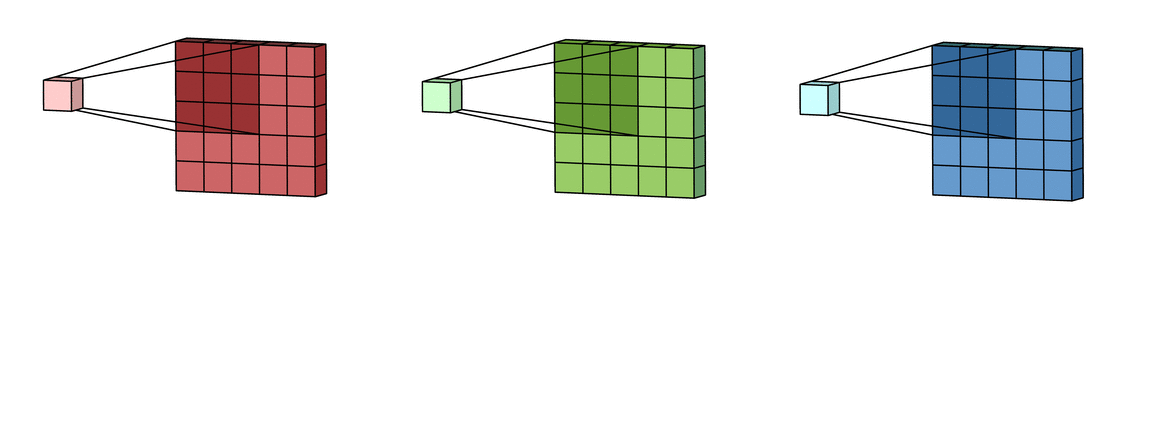

In [11]:
Image(filename="img/conv_multichannel.gif")

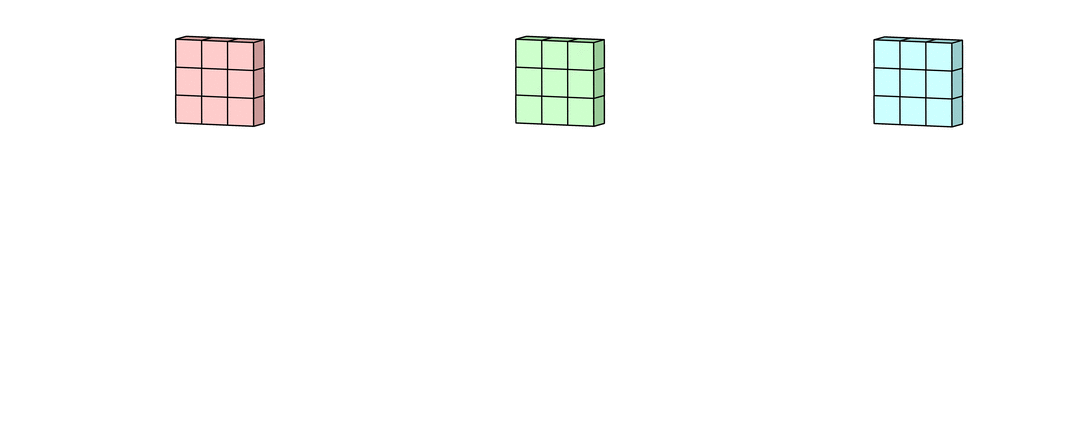

In [12]:
Image(filename="img/conv_multichannel_2.gif")

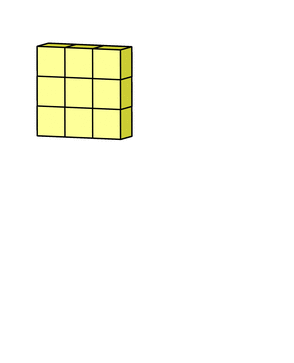

In [13]:
Image(filename="img/bias_cnn.gif")

### Padding    

El **padding** consiste simplemente en agregar pixeles con valor igual a cero a los bordes de la imagen original, tal y cómo se muestra en la siguiente imagen.   
Por tanto:   

- Sólo hay 9 formas de aplicar un parche 3x3 a un imagen de 5x5.(sin **padding**)
- Si se quiere aplicar a todos los pixeles --> **padding** (añadir filas y columnas para hacerlo posible)
```python
Conv2D(...,padding=<valor>): 'valid' sin padding, 'same' para igualar tamaño input y output feature 
```

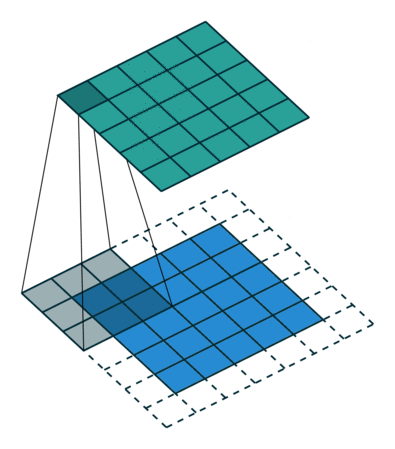

In [14]:
Image(filename="img/conv_padding.gif")

### Striding ##

En la convolución original, el kernel se desplaza un pixel hacia la derecha, o hacia abajo, durante cada iteración. Cada uno de estos desplazamientos se conoce como stride (o salto), y en la convolución original este valor es igual a 1, aunque también es posible realizar la convolución con strides mayores, lo que permite obtener imágenes resultantes de menor tamaño en comparación con las obtenidas en la convolución original

- El **Stride**, por tanto, determina el salto entre ventana y ventana

```python
Conv2D(...,stride=<valor>): int, salto entre ventanas 
```

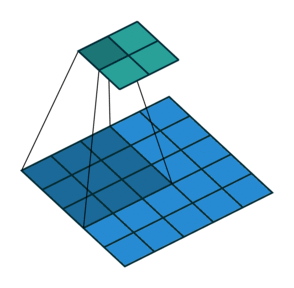

In [15]:
Image(filename="img/conv_stride.gif")

### Pooling   

El objetivo de la capa de agrupamiento (**pooling**) es extraer las características más significativas de la matriz convolucionada. Esto se hace aplicando algunas operaciones de agregación, que reducen la dimensión del mapa de características (matriz convolucionada), reduciendo así la memoria utilizada durante el entrenamiento de la red. El agrupamiento también es relevante para *mitigar el sobreajuste*.      

Las funciones de agregación más comunes que pueden aplicarse son:

- **Max-pooling**, que es el valor máximo del mapa de características
- **Sum-pooling**, que es la suma de todos los valores del mapa de características
- **Average-pooling**, que es la media de todos los valores.

En resumen:   
- Se usan para hacer **downsampling del input feature (conjunto inicial de entrada)** (reducir dimensionalidad espacial)
- Similar a convoluciones, pero no aplican un kernel sino que aplican **funcion 'max' (o average)**
- Por defecto, tamaño 2x2 y stride 2

In [16]:
# red sin pooling

from tensorflow.keras import models
from tensorflow.keras import layers

convnet_nopooling = models.Sequential()
convnet_nopooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_nopooling.add(layers.Flatten())
convnet_nopooling.add(layers.Dense(512,activation='relu'))
convnet_nopooling.add(layers.Dense(10,activation='softmax'))

convnet_nopooling.summary()

e:\Users\Jordi\anaconda3\envs\ceiadb\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,945,578 (72.27 MB)

 Trainable params: 18,945,578 (72.27 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Red con pooling
convnet_pooling = models.Sequential()

########################## BASE MODEL ###### ENCARGADO DE EXTRAER CARACTERÍSTICAS AUTOMÁTICAMENTE
#BLOQUE CONVOLUCIONAL 1
convnet_pooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))

#BLOQUE CONVOLUCIONAL 2
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))

########################## TOP MODEL ###### ENCARGADO LLEVAR A CABO LA CLASIFICACIÓN
convnet_pooling.add(layers.Flatten())
convnet_pooling.add(layers.Dense(512,activation='relu'))
convnet_pooling.add(layers.Dense(10,activation='softmax'))

convnet_pooling.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

# EJEMPLO PRÁCTICO
## MODELO RED NEURONAL CONVOLUCIONAL

Usaremos el dataset de imágenes de flores ("flowers") que dispone de 5 clases distintas de flores y que forma parte de los datasets de tensorflow.

Previamente haremos un preprocesamiento para estandarizar todas las imágenes en un tamaño único. De igual modo, las imágenes tienen tres canales de color (rojo, verde y azul).

### 1. IMPORTAMOS LIBRERÍAS

In [9]:
# IMPORTAMOS LIBRERIAS
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np

### 2. DESCARGAMOS DATASET "Flowers"

Los parámetros *as_supervised*, *with_info* descargan información y metadatos adicionales retornando dos valores que se almacenan en las variables datos y metadatos:

Enlace para descarga:    
http://download.tensorflow.org/example_images/flower_photos.tgz

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


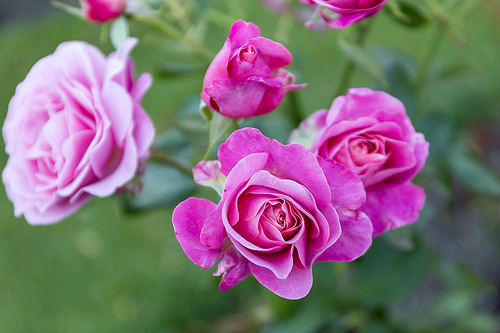

In [6]:
import PIL.Image
import PIL 

roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


I0000 00:00:1764946690.388092   38885 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


### 3. ANÁLISIS DEL DATASET

Se puede observar lo siguiente:

- Las imágenes tienen diferentes tamaños.
- Tienen tres canales de color (son imágenes a color).

Clases encontradas: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


2025-12-05 16:05:58.208618: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


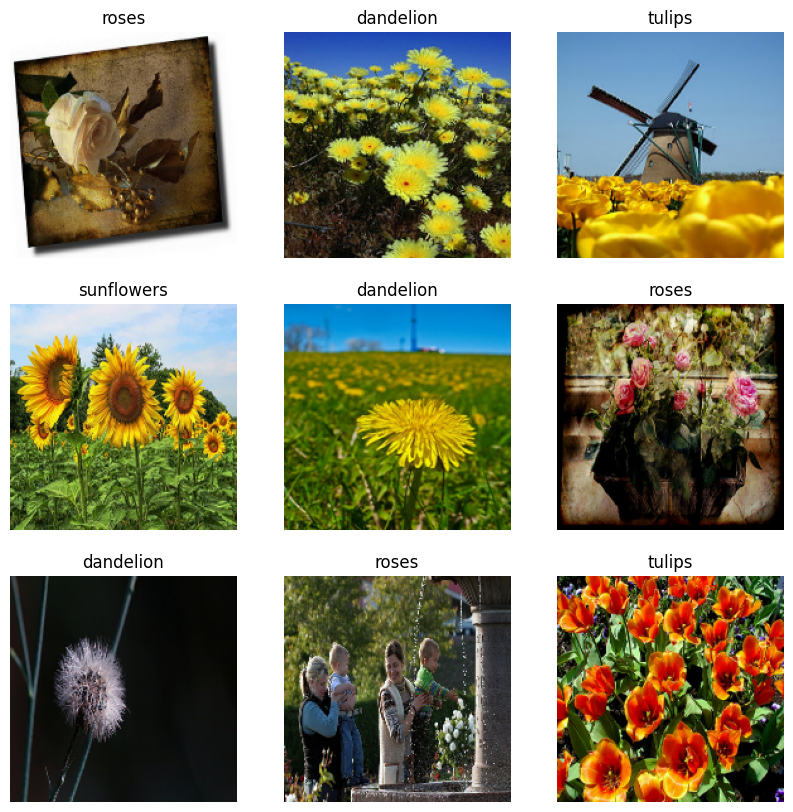

In [14]:
class_names = train_ds.class_names
print("Clases encontradas:", class_names)

# 2. Configuramos el gráfico
plt.figure(figsize=(10, 10))

# 3. Tomamos un solo lote (batch) de 32 imágenes para visualizar
for images, labels in train_ds.take(1):
    for i in range(9): # Mostramos solo las 9 primeras
        ax = plt.subplot(3, 3, i + 1)
        
        # Convertimos los tensores a formato compatible con imagen (enteros 0-255)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Ponemos el nombre de la flor como título
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

### 4. PREPROCESADO DE DATOS (SOBRE UNA MUESTRA REDUCIDA)

A modo de ejemplo se realiza el preprocesado de solo 20 imágenes. En base a lo visto en el paso 3, haremos los siguiente:

- Se redimensionan las imágenes a 100x100 px, reduciendo e igualando su tamaño (así se disminuye el número de neuronas en la capa de entrada y el tiempo de entrenamiento).
- Pasaremos de color a imágenes en escala de grises (se reduce así el procesamiento).

2025-12-05 16:15:10.606750: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


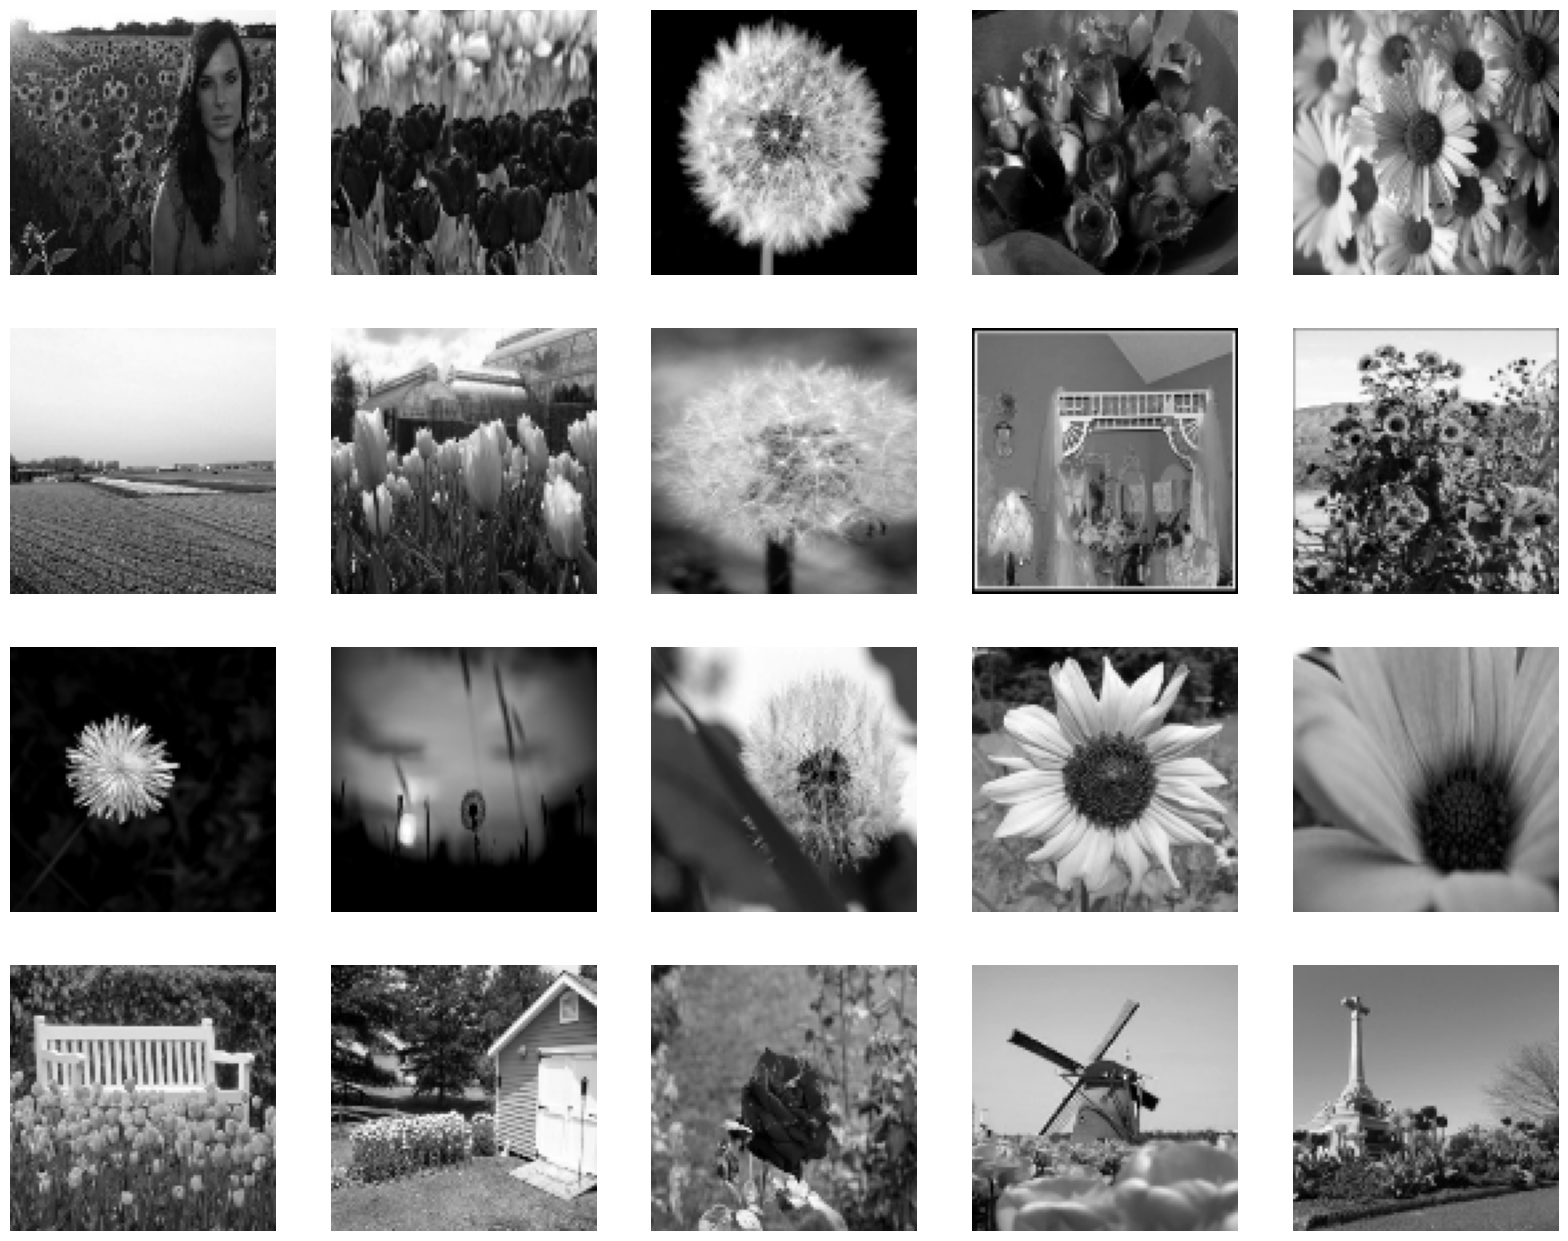

In [18]:
plt.figure(figsize=(20,20))

TAMANO_IMG=100

train = train_ds.unbatch()
# redimensionamos solo a 20 imágenes
for i, (imagen, etiqueta) in enumerate(train.take(20)):
  # IMPORTANTE: Convertimos a uint8. OpenCV y Matplotlib pueden fallar 
    # visualmente si reciben floats (0.0-255.0) en lugar de enteros.
  img_numpy = imagen.numpy().astype("uint8")
  # a. Redimensionamos las imágenes a 100x100 píxeles:
  imagen = cv2.resize(img_numpy, (TAMANO_IMG, TAMANO_IMG))
  # b. Pasamos de color a escala de grises:
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")
  plt.axis("off")

Comprobamos el número de clases que tiene el dataset

In [21]:
num_classes = len (train_ds.class_names)
print(num_classes)

5


Creamos una lista el cual almacenará todo el conjunto de imágenes.

In [22]:
datos_entrenamiento = []

### 5. PREPROCESADO DE TODAS LAS IMÁGENES

In [23]:
train = train_ds.unbatch()

for i, (imagen, etiqueta) in enumerate(train):
  # IMPORTANTE: Convertimos a uint8. OpenCV y Matplotlib pueden fallar 
    # visualmente si reciben floats (0.0-255.0) en lugar de enteros.
  img_numpy = imagen.numpy().astype("uint8")
  # a. Redimensionamos las imágenes a 100x100 píxeles:
  imagen = cv2.resize(img_numpy, (TAMANO_IMG, TAMANO_IMG))
  # b. Pasamos de color a escala de grises:
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

  # datos_entrenamiento: lista que almacenará listas de dos posiciones (los pixeles
  # de la imágen y su etiqueta)
  datos_entrenamiento.append([imagen, etiqueta])

In [24]:
#datos_entrenamiento ahora contiene las 3670 imágenes preprocesadas
len(datos_entrenamiento)

2936

### 6. SEPARACIÓN DE CONJUNTOS DE ENTRENAMIENTO

In [25]:
X = []
y = []

# Iteramos todos los datos de entrenamiento y lo agregamos en X (imagen), y (etiqueta):
for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

### 7. NORMALIZACIÓN DE IMÁGENES

Se divide cada píxel entre 255, para discretizar los valores de cada píxel dentro del rango [0, 1]

In [26]:
X = np.array(X).astype(float) / 255

# Pasamos a "y" en un arreglo de numpay
y = np.array(y)

### 8. DISEÑO ARQUITECTURA MODELO RED NEURONAL CONVOLUCIONAL - CNN

Se mezclan las capas convolucionales, densas y de aplanado/agrupación, así como las de *pooling* que aportan reducción de dimensionalidad

In [27]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(100, 100, 1)),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes)
])

Dado que se trata de una clasificación multiclase, usamos como función de pérdida la **SparseCategoricalCrossentropy** y el optimizador **Adam**

In [28]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #usamos esta pérdida porque es multiclase
    metrics=["accuracy"]
)

Pasamos a entrenar el modelo. Dentro de los parámetros que se pueden definir en este paso, está el que hace referencia al número de muestra/elementos que son evaluadas antes de que los pesos sean actualizados en la red neuronal y que se denomina *batch_size*. Si este parámetro tiene un valor pequeño, se provoca que la red tenga poca cantidad de datos en memoria y, en teoría, su entrenamiento sea más rápido.

In [29]:
train_log = modelo.fit(
    X, y, batch_size=32,
    validation_split=0.20,
    epochs=15
)

Epoch 1/15


2025-12-05 16:22:42.059748: I external/local_xla/xla/service/service.cc:163] XLA service 0x795ee0004590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-05 16:22:42.059800: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-12-05 16:22:42.130988: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-05 16:22:42.579708: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-12-05 16:22:42.663899: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-05 16:22:45.

24/74 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2619 - loss: 1.6362

I0000 00:00:1764948169.616234   42452 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 98ms/step - accuracy: 0.3062 - loss: 1.5545 - val_accuracy: 0.3724 - val_loss: 1.4817
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4238 - loss: 1.4084 - val_accuracy: 0.4473 - val_loss: 1.3647
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4753 - loss: 1.2753 - val_accuracy: 0.4864 - val_loss: 1.2841
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5434 - loss: 1.1470 - val_accuracy: 0.4813 - val_loss: 1.2722
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5758 - loss: 1.0946 - val_accuracy: 0.5017 - val_loss: 1.2785
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6580 - loss: 0.9231 - val_accuracy: 0.5340 - val_loss: 1.2549
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7155 - loss: 0.7849 - val_accuracy: 0.5170 - val_loss: 1.3020
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7717 - loss: 0.6476 - val_accuracy: 0.4813 - val_loss: 1.3

Por último, evaluamos el modelo para comprobar su eficiencia

In [30]:
modelo.evaluate(X, y, batch_size=32)

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9033 - loss: 0.5004


[0.5004152655601501, 0.9032697677612305]

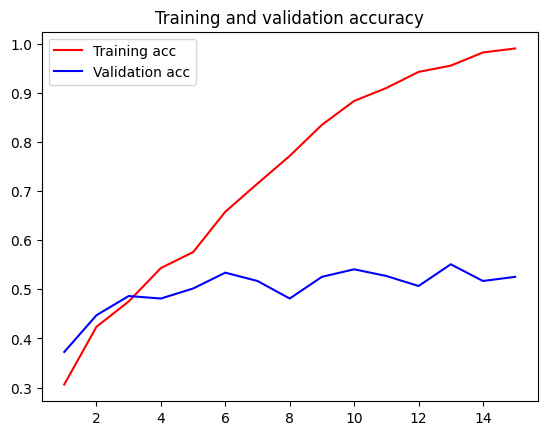

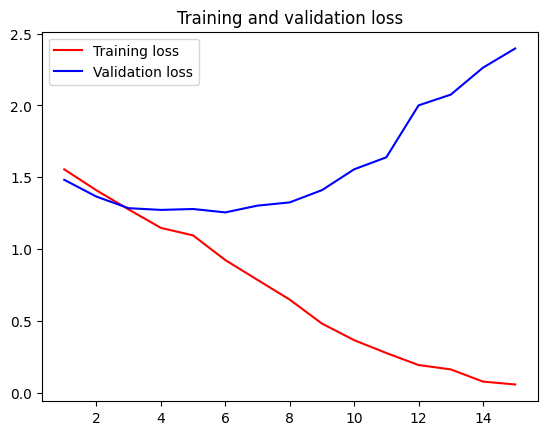

In [31]:
import matplotlib.pyplot as plt
 
acc = train_log.history['accuracy']
val_acc = train_log.history['val_accuracy']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

En la segunda gráfica observamos que hay un problema. La red neuronal comienza a tener problemas con el conjunto de validación y se observa como la función de coste crece en vez de minimizarse. Es un claro problema de overfitting. 
Vamos a recurrir a una técnica habitual en estos casos, que consiste en eliminar complejidad de la red. Al disminuir esta, conseguimos que se simplifique el modelo y que logre generalizar mejor. 
Una forma de reducir esta complejidad es eliminar algunas conexiones de forma aleatoria entre dos capas. Esto se puede hacer con una capa *Dropout()*. Como parámetro se pasa el porcentaje de conexiones que se desea anular (por ejemplo un valor de 0.25 eliminará el 25% de las conexiones).

In [32]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(100, 100, 1)),
    tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),

    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(num_classes)
])

In [33]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #usamos esta pérdida porque es multiclase
    metrics=["accuracy"]
)

In [34]:
train_log = modelo.fit(
    X, y, batch_size=32,
    validation_split=0.20,
    epochs=15
)

Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.2670 - loss: 1.6012 - val_accuracy: 0.3248 - val_loss: 1.5636
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3394 - loss: 1.5182 - val_accuracy: 0.3793 - val_loss: 1.5035
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4025 - loss: 1.4386 - val_accuracy: 0.3963 - val_loss: 1.4380
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4421 - loss: 1.3533 - val_accuracy: 0.3759 - val_loss: 1.4278
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4561 - loss: 1.3141 - val_accuracy: 0.4983 - val_loss: 1.3115
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5043 - loss: 1.2231 - val_accuracy: 0.4473 - val_loss: 1.3142
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5417 - loss: 1.1515 - val_accuracy: 0.4779 - val_loss: 1.2614
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5826 - loss: 1.0668 - val_accuracy: 0.4592 -

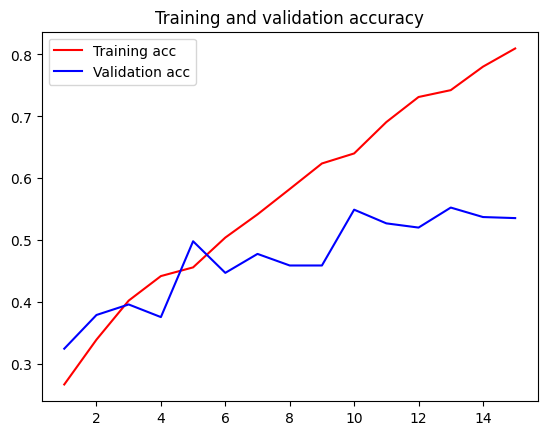

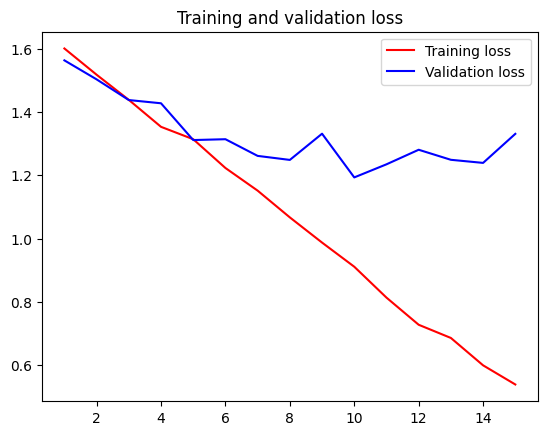

In [35]:
acc = train_log.history['accuracy']
val_acc = train_log.history['val_accuracy']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Como vemos, ahora la cosa está algo mejor, aunque sigue sin conseguir afinarse del todo. 
Puede observarse que el proceso de ajuste de este tipo de modelos requiere grandes dosis de paciencia y de repetición del experimento.